# Capstone proposal by Reto Loser

# Jass Summarizer

Attached to this main jupyter notebook are 9 sub notebooks. Alternatively you can explore the hole project in one long jupyter notebbook - [The story](the_story.ipynb).
> Note: There are different datascan in this project. At the end the datascan_ii, datascan_iv and datascan_v have been used as ML data input. The input can be customized by setting the **doFilePercent** variable to a value between 1 and 100 (do not use to small values (< 15) to be sure the testdata have at least an item for each of the 36 classes). It is also possible to run a ML task with multiple datascans together.

> Note: The long notebook - "[The story](the_story.ipynb)" could not run from start to the last cell in one run, because of limitations on the memory of the internal GPU. So I had to restart the kernel to free up GPU memory and doing a restart in the middle of the notebook. In the separated notebook this never happend.

## Data Preparation
* [02_DataPreparation_01 notebook](02_DataPreparation_01.ipynb) - Data extraction from movies & statistics
* [02_DataPreparation_02 notebook](02_DataPreparation_02.ipynb) - Data extraction from webcam 
* [02_DataPreparation_03 notebook](02_DataPreparation_03.ipynb) - Synthetic Data generation  & statistics 
* [02_DataPreparation_04 notebook](02_DataPreparation_04.ipynb) - Data prepartion & feature engineering  

## Exploratory data analysis
* [03_ExplorationDataAnalysis_01 notebook](03_ExplorationDataAnalysis_01.ipynb)  
  * Exploration on Color Separation & Clustering
  * combined Color Histogram over all Images (min, max, avg)  

## Machine Learning
* [04_Machine_learning_01](04_Machine_learning_01.ipynb) - Machine Learning with convolutional neural network  
runs the 9 different convolutional neural network models
* [04_Machine_learning_02](04_Machine_learning_02.ipynb) - Machine Learning with Pretrained model "mobilenet" with Random-Forest Classifier  
uses a pretrained model "mobilenet" with Random-Forest Classifier
* [04_Machine_learning_03](04_Machine_learning_02.ipynb) - Machine Learning with with Hyperparameter Tuning  
Does Hyperparameter tuning on the previous pretrained model "mobilenet" with Random-Forest Classifier

## Additional information
* [05_Frontend](05_Frontend.ipynb) - Frontend; interactive prediction presentation




---

# 01) Introduction - The problem

## General
After having a nice "Swiss Jass" game played, you must calculate the points of the cards you just won. Some players are really fast in counting and other use endless time to count them. Wouldn't it be nice if we could just automatically count it by dropping them in front of a camera and tell them which kind of "trumpf" you just played?  
The game has different modes to play. Here is a list of the most common used modes:
* Trumpf Eicheln (counts regular)
* Trumpf Rosen (counts regular)
* Trumpf Schellen (counts double wise)
* Trumpf Schilten (counts double wise)
* Topdown (counts triple wise)
* Downup (counts triple wise)

To count the point on the cards check the following table

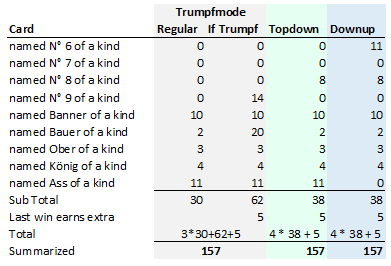

## About the cards
* the set of cards holds 36 different cards
* there are 4 different groups of cards
  * Eicheln
  * Schellen
  * Schilten
  * Rosen
* each group has 9 cards which are ordered from
  * named N° 6 of a kind
  * named N° 7 of a kind
  * named N° 8 of a kind
  * named N° 9 of a kind
  * named Banner of a kind
  * named Bauer of a kind
  * named Ober of a kind
  * named König of a kind
  * named Ass of a kind
  
<table style="border: solid #fff;horizontal-align:left;">
<!--  Website to generate base63 stream : https://www.base64-image.de/-->    
    <tr style="vertical-align:top">
        <td>Eicheln</td>
        <td>Schellen</td>
        <td>Schilten</td>
        <td>Rosen</td>          
    </tr>
    <tr style="vertical-align:top">
        <td>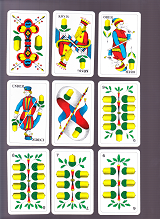</td>
        <td>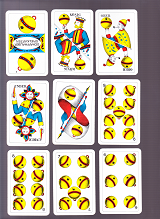</td>
        <td>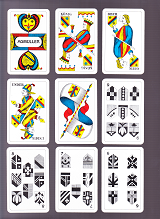</td>
        <td>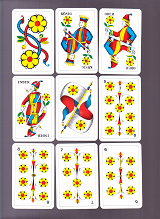</td>          
    </tr>    
</table>  


## 2) Dataexploration - The data

### (a) Clear overview of your data

The data we need are the images representing the swiss jass card set. As there is no public data set on this, I have to fullfill this requirement by self. I asume that I can start with a set of around 30-40 pictures per card. That results in a first total around 1400 images.

#### Images scanning
* To produce as much as possible images for each card representation, 
  1. I'm going to take a video from each card. I'm going to move each card in front of the lense from the left to the right.
  2. after the video has been taken, it will be separated into frames. 
  3. all the frames get the card identifier from his representation within its image filename.
* **Resolution**
  * The resolution of the source is 1920 x 1080 pixels for the mobile device
  * The resolution of the source is 640 x 480 pixels for the webcam device
* **Quality**
  * the quality is varying, because of the movment during recording
  * but in general there are no other objects on the picture except the background
* **Flexibility**
  * To get a first feeling of the data representation, I will just work with the card set from one producer
  * If needed we can add another jass card producer which has some small differences in his layout/style
  
### card identification

A card can be identified with his **type** which is
* Eicheln, Schellen, Schilten or Rosen  => (A,B,C,D)

and on the other hand on his **value**
* N6, N7, N8, N9, Banner, Bauer, Ober, König, Ass => (0,1,2,3,4,5,6,7,8)


#### Features
image

#### Target
cardType+cardValue

#### Movie type MP4
For the score process I'm going to support MP4 streams. Mp4 is a video stream, popular on almost every handy. As example you can check the following example [./images/diverse/score.mp4](./images/diverse/score.mp4) which was taken on a Samsung Galaxy S8.  
To be able to do the recognition process, we can extract each frame with the OpenCV ([Open Computer Vision](https://opencv.org)) - [Python library](https://pypi.org/project/opencv-contrib-python/).  

### Current Samples
I have already collected  
* 1150 samples in a resolution of 640x480 pixel (Scan size not object size) ([./images/All_black](./images/All_black) currently not commited because of volume)
* 13'000 samples in a resolution of 1920x1080 pixel (Scan size not object size) ([./images/BlackGalaxyScan](./images/BlackGalaxyScan) currently not commited because of volume)
* mp4 example of won cards ([score.mp4](./images/diverse/score.mp4))



### (b) Plan to manage and process the data

## Data Preparation

#### Part I Recording with Handy 
> => More details on [02_DataPreparation_01 notebook](02_DataPreparation_01.ipynb) 
* I'm going to take a movie from each card (Handy). The card is moving during recording. The record is saved as a MP4
* Next step is extracting the frames for each card movie and storing this as image  

#### Part II Recording with Webcam 
> => More details on [02_DataPreparation_02 notebook](02_DataPreparation_02.ipynb)
* I'm going to capture every second an Image from my webcam. During capturing I will move the card in front of the webcam. 
* The images are saved and directly named (cardIdentifier) during this process (enumerating trough all cards entities)  

#### Part III developing an algorithm to select the region of interest within an image
* with the help of the Open Computer Vision library, I will use different technics to find the region of interest. 
  * Grayscale bluring
  * building a mask by thresholding specific colors/shadings
  * combining contour finding  with area selection
  * My algorithm is described in the [JassSummarizer.py](JassSummarizer.py) helper module with the name **analyzeScan(frame, kThreshold = 0.4)**
* This algorithm will also be used on the final step, when the computer needs to predict the cards (in front of the webcam)
  
#### Part IV synthetic Data  
> => More details on [02_DataPreparation_03 notebook](02_DataPreparation_03.ipynb)  

On Data Preparation step 03, I'm generating synthetic image data by rotating them from -90 to 90 degree. This results are 180 * 36 images equal to around 6400 images.

#### Part IV applying the algorithm to already saved images
> => More details on [02_DataPreparation_04 notebook](02_DataPreparation_04.ipynb)  

* For convinience reason I'm going trough all images and generatea CSV with the following metadata
* Image file name
* X,Y coordinate of the bounding box where the Jasscards lie
* width and hight of the box
* rgb histogram data
* card identification (Target)

```
 .\images\All_black\D3_000032.jpg, 145, 176, 321, 178, D3
 .\images\All_black\B3_000004.jpg, 243, 93, 284, 178, B3
 .\images\All_black\A1_000022.jpg, 234, 188, 328, 171, A1
 .\images\All_black\C2_000031.jpg, 187, 141, 308, 191, C2
 .\images\All_black\D7_000021.jpg, 207, 69, 266, 240, D7
 .\images\All_black\A8_000027.jpg, 47, 136, 328, 232, A8
 .\images\All_black\D7_000025.jpg, 136, 93, 307, 229, D7
 .\images\All_black\C8_000039.jpg, 138, 112, 310, 269, C8
 .\images\All_black\D6_000016.jpg, 181, 90, 299, 242, D6
 .\images\All_black\D2_000021.jpg, 178, 99, 273, 263, D2
```


## 3) Exploratory data analysis (EDA)

### (a) Preliminary EDA

#### General

the Data - illustration of all 36 cards (images may just lookup on local loaded jupyter notebook)

![b Schellen image](images/diverse/Image_01_kl.png)
![c Schilten image](images/diverse/Image_02_kl.png)
![a Eicheln image](images/diverse/Image_03_kl.png)
![d Rosen image](images/diverse/Image_04_kl.png)


#### Statistics on data
> => More details on [03_ExplorationDataAnalysis_01 notebook](03_ExplorationDataAnalysis_01.ipynb) 

* Histogram of the class distribution on the dataset
* Histogram of the colors per class
* I'm going to generate for each class a card representation from -90° to +90° by a step of 1°


### (b) How does the EDA inform your project plan?

#### Problem identifiactions

1. Eicheln, Schellen, Rosen use one symbol for their card type. But on Schilten the Symbol in detail looks always diffrent
2. Schellen and Rosen both have a big amount on color yellow and red
3. Schilten Ass has not realy a typical symbol for his type
4. the cardset is many times harder then the well known french type card (clubs ♣, diamonds (♦), hearts ♥ and spades ♠)  
  This cards have a identifier in the upper left which tells you number and type
5. Background structure
6. light conditions
7. predictions duration
8. unwanted prediction during movement

#### Solutions
* May simplifying with black and whit could help if the resolutioin is high enough  => 1,2,3,4,7
* More then 50'000 images may could improve results => 1,2,3,4
* Color separation technics could improve prediction => 2,3
* accept predictions if they stay longer then 0.2 seconds => 8
* multiple threshold sets => 5,6


### (c) What further EDA do you plan for project?

* the model is going to generate images with different angles
* The data can be extended by using multiple card sets from diffrent producers (vendors)
* The data can be improved by learing them on diffrent angels clock- and counter clockwise
* the images can be modified to support multiple light situations or/and backgrounds


## 4) Machine learning 

### (a) Phrase your project goal as a clear machine learning question

During the presentation of all won/owned cards in front of the webcam, we can capture the scene. Because that the most card on top is fully visible, I hope to detect it's identification by a machine learning classification technic. To identify new cards I will proced as the following:

* there is an infinite loop
* the scaned scene is analyzed on each iteration with the analyzeScan function 
* if a contour is found it predicts the card identification
* if a prediction was successfull and identical for a specific amount (around 12 times) it accepts this prediction
* an accepted prediction is verified with a beep signal
* if there is a new prediction during the loop because of a change in the scene (dropping another card), and this prediction has again been verified a specific amount all the time with the same value, it gets accepted and so further

> **NOTE 1:**  
If a prediction is accepted, then this cardId will be taken and the function calculateScore within the helper module JassSummarizer.py, is evaluating the score, depending on the Jassmode which was choosen.  
> **NOTE 2:**  
Some keystroke during the infinite loop are accepted to set the desired Jassmode:  

|Esc| SPACE  | 1  | 2  | 3  | 4  | 5  | 6  |   
|---|---|---|---|---|---|---|---|
|Exit|Score Reset|Eicheln|Schellen|Schilten|Rosen|Topdown|Downup| 


### (b) What models are you planning to use and why?

I would like tu use keras with the convolutional neural network algorithm. The reason for this is, that many machine leanring examples use a kind of CNN or further improved kind of for object classifications on images.  
To train the model, I will use different image dimension and compare them to each other in there efficiency.
May I also check if I can improve the result we a pretrained model like mobileNet.


### (c) Please tell us your detailed machine learning strategy 

### On my favorite dataset I do:
#### applying a convolutional neural network layer
    * using image dimension of 32 * 32
    * using image dimension of 64 * 64
    * using image dimension of 224 * 224  
---    
#### applying a convolutional neural network layer
#### adding image data generation component and running it without early stopping callback
    * using image dimension of 32 * 32
    * using image dimension of 64 * 64
    * using image dimension of 224 * 224
---
#### applying a convolutional neural network layer
#### adding images with angles from -90° to +90° by a step of 1°
    * using image dimension of 32 * 32
    * using image dimension of 64 * 64
    * using image dimension of 224 * 224
---
### Pretrained Model with K-nearest Neighbor or Random-Forest Classifier
#### applying the pretrained Model with the K-nearest Neighbor or Random-Forest Classifier
    * using image dimension of 224 * 224
---    
### Hyperparameter tuning on model setup with Pretrained Model
* If I choose to use KNeighborsClassifier
    * I will tune the n_neighbors parameter
* If I choose to use Random Forest Classifier
    * I will tune the n_estimators = number of trees in the foreset parameter
    * I will tune the Maximum number of levels in tree
    * may add max_features
    * may add min_samples_split
    * may add min_samples_leaf
    * may add bootstrap    
---


## 5) Additional information



To summarize the cards that have been won, they will be dropped in front of a webcam. The webcam scans the image which is preprocessed before it will feed the ML model with it's data. The prediction is identifying the card and accumulates if necessary the point to the total score. 